In [536]:
# Kaggle Titanic Competition

# This is for my self-learning and to get more acquainted with Kaggle Competition.
# This code is taken from A Journey through Titanic by Omar El Gabry
# I have used MLP classifier for submission

import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [537]:
titanic_df = pd.read_csv('input-files/train.csv')
test_df = pd.read_csv('input-files/test.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [538]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [539]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [540]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [541]:
test_df.drop(['Name', 'Ticket'], axis = 1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S
5,897,3,male,14.0,0,0,9.2250,NaN,S
6,898,3,female,30.0,0,0,7.6292,NaN,Q
7,899,2,male,26.0,1,1,29.0000,NaN,S
8,900,3,female,18.0,0,0,7.2292,NaN,C
9,901,3,male,21.0,2,0,24.1500,NaN,S


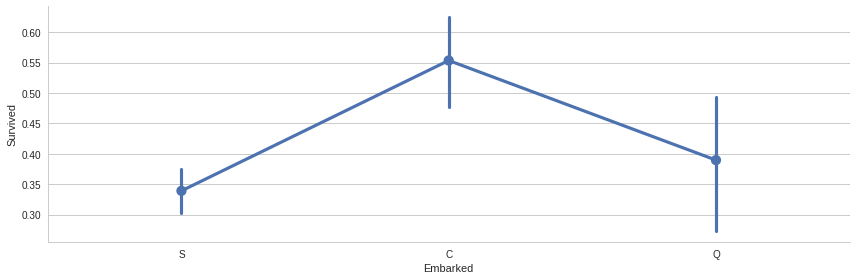

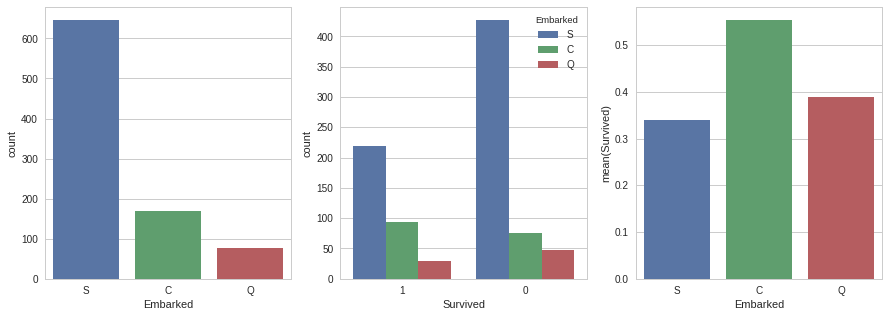

In [542]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

sns.factorplot('Embarked', 'Survived', data = titanic_df, size = 4, aspect = 3)

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15,5))

sns.countplot(x = 'Embarked', data=titanic_df, ax=axis1)
sns.countplot(x = 'Survived', hue = 'Embarked', order=[1,0], data=titanic_df, ax=axis2)

embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)


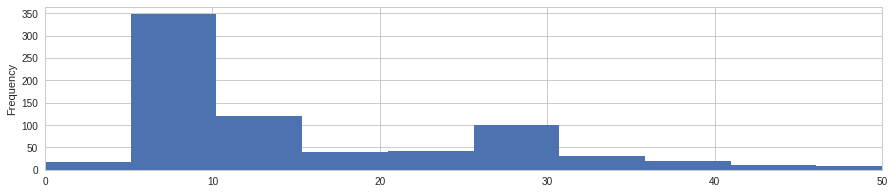

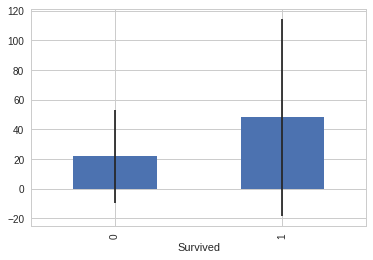

In [543]:
# Fares

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

# fare for survived and dead passengers
fare_not_survived = titanic_df['Fare'][titanic_df['Survived'] == 0]
fare_survived = titanic_df['Fare'][titanic_df['Survived'] == 1]

# get average and std for fare of survived/dead passengers
average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot Fare column from training set
titanic_df['Fare'].plot(kind='hist', figsize=(15,3), bins=100, xlim=(0,50))

# plot average/std fare plot of survived/dead passengers
average_fare.index.names = std_fare.index.names = ["Survived"]
average_fare.plot(yerr=std_fare, kind='bar', legend = False)

/home/oyashi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/oyashi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


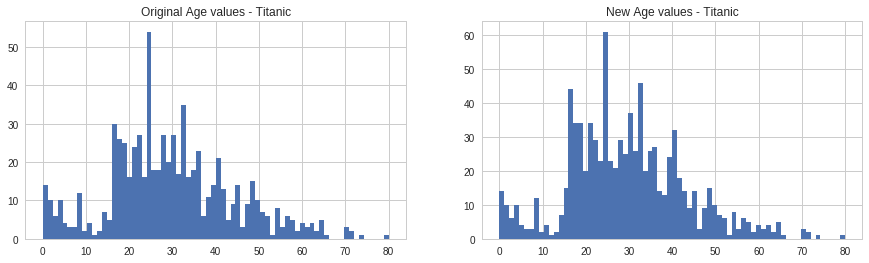

In [544]:
# Age

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std and count of NaN values in titanic_df training set
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std and count of NaN values in titanic_df training set
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size=count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size=count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
#test_df['Age'].hist(bins=70, ax=axis2)

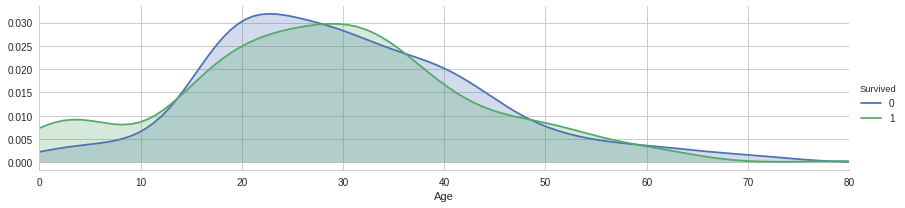

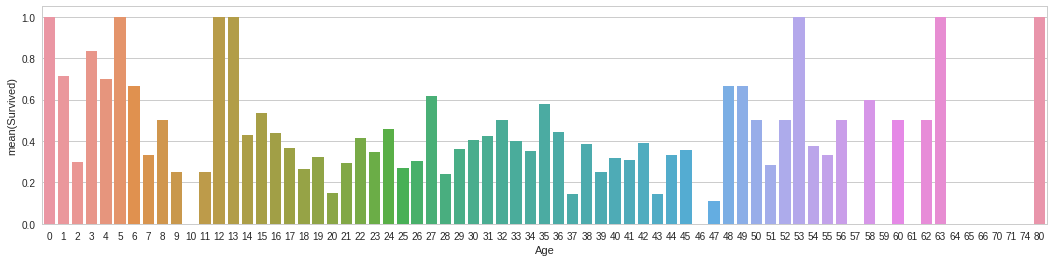

In [545]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1, figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [546]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

/home/oyashi/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


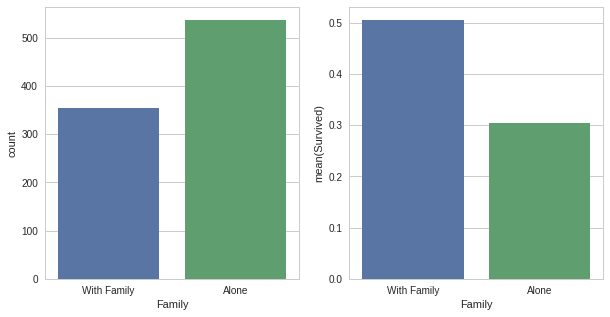

In [547]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

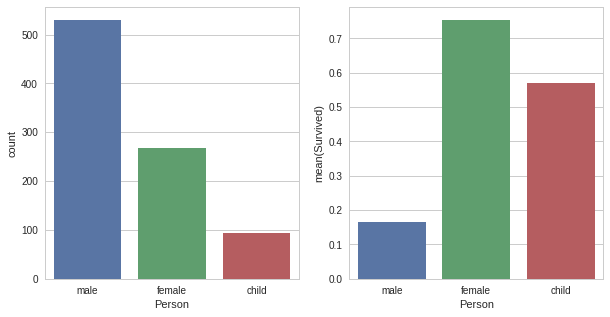

In [548]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child', 'Male', 'Female']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df = test_df.join(person_dummies_test)

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'], as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male', 'female', 'child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

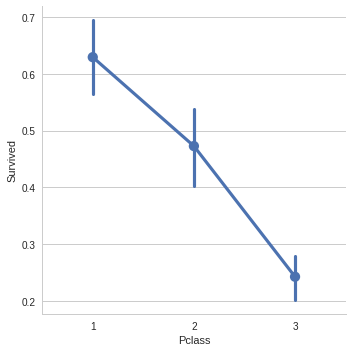

In [549]:
# Pclass

sns.factorplot('Pclass','Survived', order=[1,2,3], data=titanic_df, size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [550]:
# define training and testing set

X_train = titanic_df.drop(['PassengerId', 'Name', 'Ticket','Survived'], axis=1)
Y_train = titanic_df['Survived']
X_test = test_df.drop(['Name', 'Ticket','PassengerId'], axis=1).copy()


In [551]:
# LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred_logreg = logreg.predict(X_test)

acc_logreg = logreg.score(X_train, Y_train)

print('Accuracy of Logistic Regression: %.5f' % acc_logreg)

Accuracy of Logistic Regression: 0.80022


In [552]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred_svc = svc.predict(X_test)

acc_svc = svc.score(X_train, Y_train)

print('Accuracy of SVM: %.5f' % acc_svc)

Accuracy of SVM: 0.86532


In [553]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred_random_forest = random_forest.predict(X_test)

acc_rforest = random_forest.score(X_train, Y_train)

print('Accuracy of Random Forest: %.5f' % acc_rforest)

Accuracy of Random Forest: 0.95735


In [554]:
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

Y_pred_knn = knn.predict(X_test)

acc_knn = knn.score(X_train, Y_train)

print('Accuracy of KNN: %.5f' % acc_knn)

Accuracy of KNN: 0.79798


In [555]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred_gaussian = gaussian.predict(X_test)

acc_gaussian = gaussian.score(X_train, Y_train)

print('Accuracy of Gaussain Naive Bayes: %.5f' % acc_gaussian)

Accuracy of Gaussain Naive Bayes: 0.74186


In [22]:
# MLP Classifier

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=100, activation='tanh', solver='lbfgs', learning_rate_init=0.001, max_iter = 1000)

# mlp = MLPClassifier()

mlp.fit(X_train, Y_train)

Y_pred_mlp = mlp.predict(X_test)

acc_mlp = mlp.score(X_train, Y_train)

print('Accuracy of MLP: %.5f' % acc_mlp)

Accuracy of MLP: 0.92031


In [556]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier

#sgd = SGDClassifier(hidden_layer_sizes=100, activation='tanh', solver='lbfgs', learning_rate_init=0.001, max_iter = 10000)

sgd = SGDClassifier(loss='squared_loss', n_iter=10000)

sgd.fit(X_train, Y_train)

Y_pred_sgd = sgd.predict(X_test)

acc_sgd = sgd.score(X_train, Y_train)

print('Accuracy of SGD Classifier: %.5f' % acc_sgd)

Accuracy of SGD Classifier: 0.48934


In [24]:
# MLP Regressor

# from sklearn.neural_network import MLPRegressor

# mlp = MLPRegressor(hidden_layer_sizes=100, activation='tanh', solver='lbfgs', learning_rate_init=0.0001, \
#                    max_iter = 10000)

# # mlp = MLPRegressor()

# mlp.fit(X_train, Y_train)

# Y_pred_mlp = mlp.predict(X_test)

# acc_mlp = mlp.score(X_train, Y_train)

# print('Accuracy of MLP: %.5f' % acc_mlp)

In [557]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Survived,-0.016349
1,Name,0.001768
2,Age,-0.224894
3,Ticket,-0.615127
4,Fare,-2.776133
5,Family,2.083694
6,Child,1.093070
7,Female,NaN
8,Class_1,NaN
9,Class_2,NaN


In [558]:
# Submission results of Logistic Regression

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_logreg
    })
submission.to_csv('titanic_logreg.csv', index=False)

In [559]:
# Submission results of SVM

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_svc
    })
submission.to_csv('titanic_svm.csv', index=False)

In [560]:
# Submission results of RandomForestClassifier

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_random_forest
    })

submission.to_csv('titanic_random_forest.csv', index=False)

In [561]:
# Submission results of KNN

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_knn
    })

submission.to_csv('titanic_knn.csv', index=False)

In [562]:
# Submission results of GaussianNB

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_gaussian
    })

submission.to_csv('titanic_gaussian.csv', index=False)

In [563]:
# Submission results of MLP Classifier

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_mlp
    })

submission.to_csv('titanic_mlp.csv', index=False)

In [564]:
# Submission results of SGD Classifier

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_sgd
    })

submission.to_csv('titanic_sgd_classifier.csv', index=False)

In [825]:
# Convert function to flip 0/1 to create 'Dead' column
def convert(x):
    return x^1

# Create a column 'Dead' which is 1 & 0 if passenger is dead & survived respectively
titanic_df['Dead'] = titanic_df['Survived'].apply(convert)

# define training and testing set
X_train = titanic_df.drop(['PassengerId', 'Name', 'Ticket','Survived', 'Dead'], axis=1)
Y_train = titanic_df[["Survived","Dead"]]

X_test = test_df.drop(['Name', 'Ticket','PassengerId'], axis=1).copy()

In [831]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, 34)
        self.linear3 = nn.Linear(34, 5)
        self.linear4 = nn.Linear(5, D_out)
        
    def forward(self, x):
        x = F.tanh(self.linear1(x))
        x = F.tanh(self.linear2(x))
        x = F.tanh(self.linear3(x))
        x = F.dropout(self.linear4(x))
        return x
    
# N is batch size
N = X_train.shape[0]

# D_in is input dimension = 7 selected features
D_in = X_train.shape[1]

# H is hidden dimension
H = 50

# D_out is output dimension = Dead or Survived
D_out = 2
        
# Number of rows of test data    
N_test = X_test.shape[0]

In [832]:
x_train_set = X_train.as_matrix()
x_train = Variable(torch.from_numpy(x_train_set).float())

y_train_set = Y_train.as_matrix()
y_train = Variable(torch.from_numpy(y_train_set).float())
y_train = y_train.unsqueeze(0)

x_test_set = X_test.as_matrix()
x_test = Variable(torch.from_numpy(x_test_set).float())

In [838]:
model = Net(D_in, H, D_out)
criterion = nn.MSELoss(size_average=False)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

current_loss = 0
all_losses = []    

plot_every  = 50

for t in range(1000):    
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_train)
    
    # Compute and print loss               
    loss = criterion(y_pred, y_train)
    print(t, loss.data[0])
    current_loss += loss.data[0]
    
    # Make the gradients zero
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    if t % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
        
    

0 1152.1767578125
1 1028.50146484375
2 925.5081787109375
3 843.3807983398438
4 780.9205322265625
5 735.430419921875
6 702.8036499023438
7 678.392578125
8 658.1417846679688
9 639.34716796875
10 620.6736450195312
11 601.7943115234375
12 582.9566650390625
13 564.6316528320312
14 547.2811279296875
15 531.24560546875
16 516.7081298828125
17 503.7040100097656
18 492.1558532714844
19 481.9219970703125
20 472.82672119140625
21 464.6844177246094
22 457.3278503417969
23 450.60906982421875
24 444.4075927734375
25 438.63262939453125
26 433.21746826171875
27 428.11895751953125
28 423.30859375
29 418.7745666503906
30 414.5110778808594
31 410.5161437988281
32 406.7908020019531
33 403.3349609375
34 400.1451416015625
35 397.2160949707031
36 394.54034423828125
37 392.1028137207031
38 389.88623046875
39 387.8706359863281
40 386.0354919433594
41 384.3616638183594
42 382.82830810546875
43 381.4190673828125
44 380.1187438964844
45 378.9141540527344
46 377.7962951660156
47 376.7559814453125
48 375.7879638671

In [839]:
output = model(x_test)

_, predicted = torch.max(output.data,1)

results = predicted.numpy().flatten().tolist()

ground_truth_df = pd.read_csv('input-files/gender_submission.csv')

ground_truth = ground_truth_df["Survived"]

correct = 0
total = N_test

for data_results, data_gt in zip(results, ground_truth):
    correct += (data_results == data_gt).sum()

print(' Accuracy of the network : %d %%' % 
      (100 * correct / total))

 Accuracy of the network : 79 %


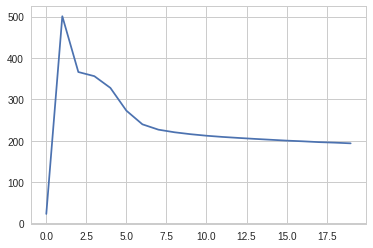

In [840]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

plt.figure()
plt.plot(all_losses)

In [841]:
# Submission results of Neural Network

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": results
    })
submission.to_csv('titanic_nn_pytorch.csv', index=False)